El objetivo de las actividades propuestas es desarrollar intuición sobre la estructura semántica subyacente en embeddings de documentos y palabras básicos generados a partir de conteos y hacer un análisis exploratorio de forma cualitativa. Para ello se trabajará con el dataset 20 Newsgroups (disponible a través de sklearn) y diferentes formas de construir embeddings de documentos y de palabras:



1.  Usar las vectorizaciones disponibles en sklearn de CountVectorizer y TfidfVectorizer para construir la matriz de documento-término. Esto proveerá de embeddings para cada documento. Con esta vectorización explorar similaridad entre documentos (tomar algún documento y evaluar los documentos correspondientes con mayor similaridad), dado que el dataset provee también clasificación anotada en tópicos se aprovechar esta clasificación como elemento extra para comprobar la similaridad de documentos. Explorar vectorizar con diferentes cantidades de n-gramas. Toda exploración adicional a las mencionadas es bienvenida.
2. Repetir la exploración de similaridad de documentos pero utilizando la vectorización resultante de aplicar truncated SVD (disponible en sklearn) a la matriz de documento-término.
3. Transponer la matriz documento-término, esto resultará en la matriz término-documento que provee embeddings de palabras. Explorar similaridad entre términos.
4. Construir la matriz término-clase con las clases disponibles en 20 Newsgroups y con estos embeddings de palabras resultantes explorar similaridad entre términos.
5. Construir la matriz término-término utilizando una ventana de contexto. Para construir esta matriz serán útiles las funcionalidades de Keras make_sampling_table, skipgrams y el tokenizador de Keras. Explorar resultados de similaridad de términos con diferentes tamaños de contexto.
6. Con la matriz término-término construir la matriz de PPMI y factorizarla aplicando truncated SVD. Explorar resultados de similaridad término a término.


Para la entrega enviar un link a un repositorio que contenga las notebooks donde esté asentada la actividad y resultados y archivos de código asociados.

In [136]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
import numpy as np
import random
%matplotlib ipympl

In [71]:
TNG_train = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'))

In [16]:
TNG_train.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [150]:
cv = TfidfVectorizer(ngram_range=(1,1), max_df=1.0, min_df=1, max_features=None, stop_words='english')
res = cv.fit_transform(TNG_train.data)
display(res)

<11314x101322 sparse matrix of type '<class 'numpy.float64'>'
	with 755809 stored elements in Compressed Sparse Row format>

Parece que las stops words default de sklearn no estan tan buenas. https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words

In [90]:
len(cv.get_feature_names_out())

101322

In [91]:
matriz_similaridad = cosine_similarity(res)
print(matriz_similaridad.shape)

(11314, 11314)


/tmp/ipykernel_5735/2988763543.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  diff_category_similarity = [matriz_similaridad[reference_article, j] for j in range(matriz_similaridad.shape[0]) if j not in articles_by_category['sci.electronics'][..., 1]]


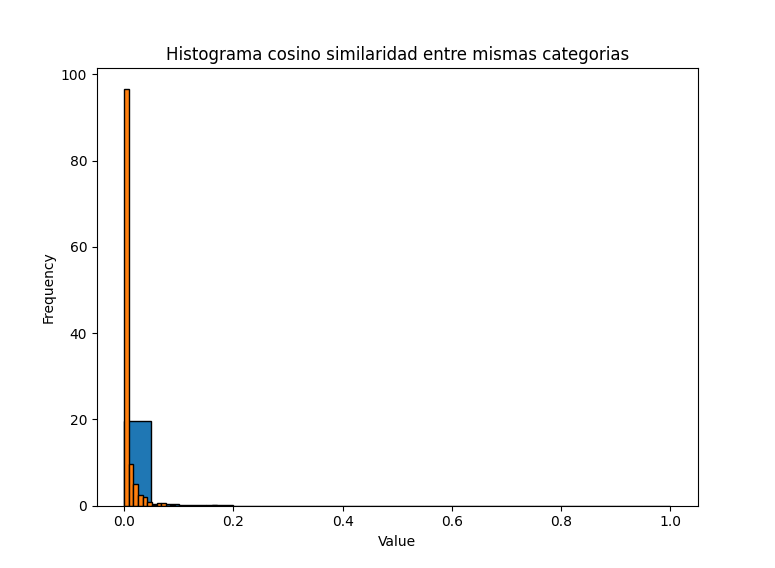

In [149]:
# Hago un diccionario para agrupar los articulos por categoria
articles_by_category = {}
indexes_by_category = {}

for i, category in enumerate(TNG_train.target_names):
    category_articles = np.array([[TNG_train.data[j], j] for j in range(len(TNG_train.data)) if TNG_train.target[j] == i])
    articles_by_category[category] = category_articles

reference_article = int(random.choice(articles_by_category['sci.electronics'][..., 1]))

same_category_similarity = [matriz_similaridad[reference_article, int(j)] for j in articles_by_category['sci.electronics'][..., 1] if int(j) != reference_article]
diff_category_similarity = [matriz_similaridad[reference_article, j] for j in range(matriz_similaridad.shape[0]) if j not in articles_by_category['sci.electronics'][..., 1]]

plt.clf()
plt.hist(diff_category_similarity, edgecolor='black', bins=20, density=True)
plt.hist(same_category_similarity, edgecolor='black', bins=20, density=True)

plt.xlabel('Value')
plt.ylabel('Frequency')

plt.title('Histograma cosino similaridad entre mismas categorias')

plt.show()
